<a href="https://colab.research.google.com/github/raju98610/IMDB-Data-Analysis/blob/main/IMDb_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
movies = pd.read_csv('/work/imdb_1000.csv')

In [ ]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
movies.shape

(979, 6)

In [ ]:
# check the data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [ ]:
# calculate the average movie duration
movies['duration'].mean()

120.97957099080695

In [ ]:
# sort the DataFrame by duration to find the shortest and longest movies
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


Text(0.5, 1.0, 'Bar Chart - Number of Titles by Genre')

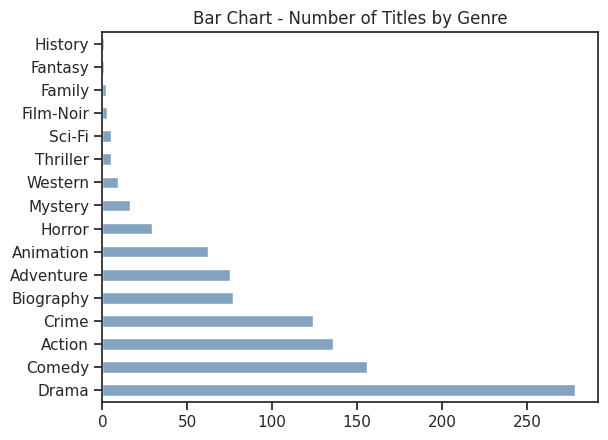

In [ ]:
ax = movies['genre'].value_counts().plot(kind='barh', color=(0.2, 0.4, 0.6, 0.6))
import matplotlib.ticker as mtick
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
plt.xticks()

plt.title('Bar Chart - Number of Titles by Genre')

Text(0.5, 1.0, 'Pie Chart - Number of Titles by Genre')

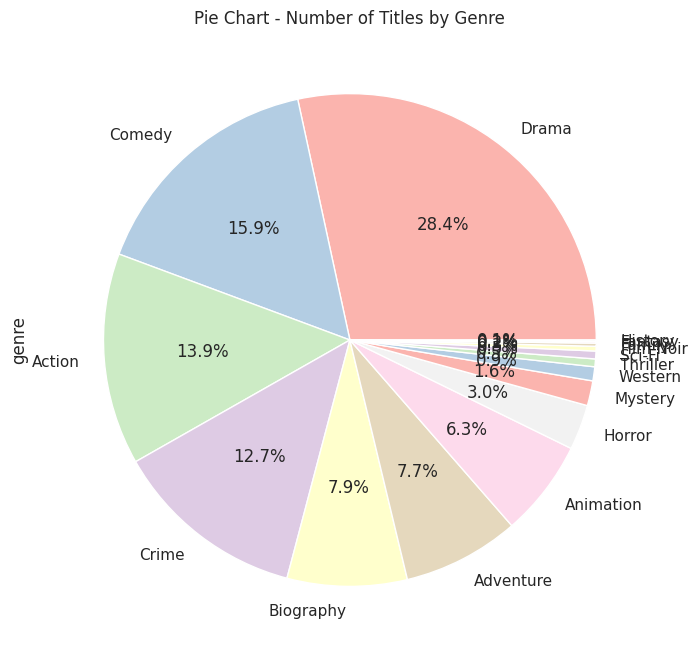

In [ ]:
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

movies['genre'].value_counts().plot(kind='pie', subplots=True,autopct='%1.1f%%', figsize=(8, 8), colors=colors)
plt.title('Pie Chart - Number of Titles by Genre')

<AxesSubplot: ylabel='Frequency'>

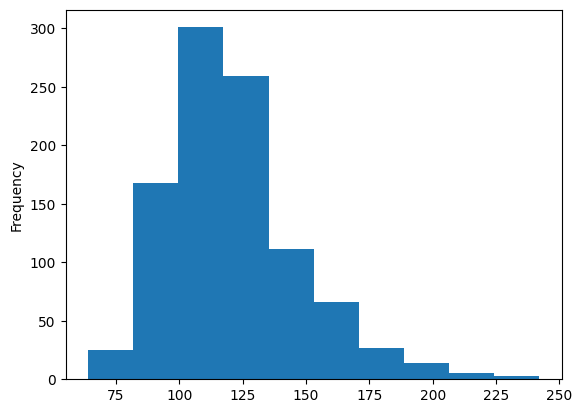

In [ ]:
# create a histogram of duration, choosing an "appropriate" number of bins
movies['duration'].plot(kind='hist', bins=10)

<AxesSubplot: >

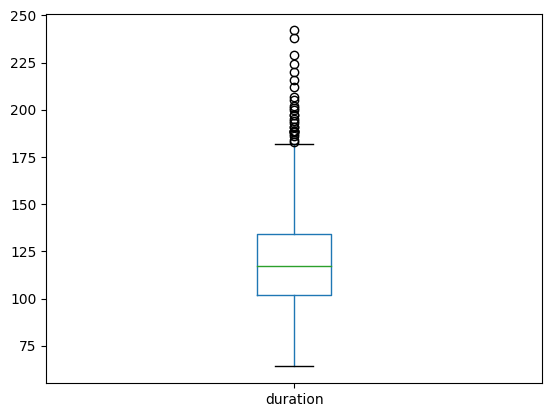

In [ ]:
movies['duration'].plot(kind='box')

In [ ]:
# count how many movies have each of the content ratings
movies[['content_rating','title']].groupby('content_rating').count()

,title
content_rating,
APPROVED,47
G,32
GP,3
NC-17,7
NOT RATED,65
PASSED,7
PG,123
PG-13,189
R,460


Text(0, 0.5, 'Title Count')

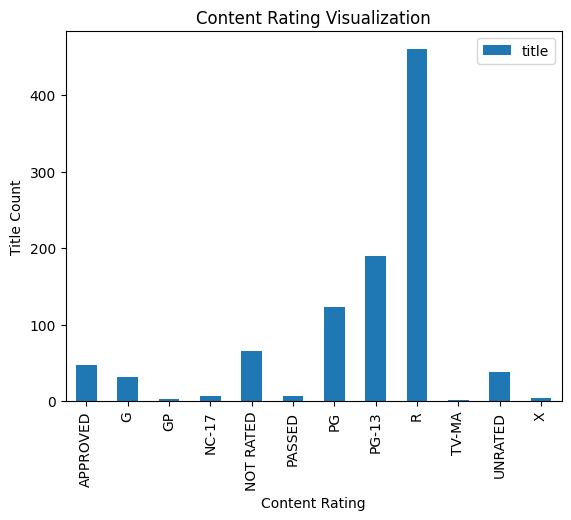

In [ ]:
# use a visualization to display that same data, including a title and x and y labels #fontsize=25
movies[['content_rating','title']].groupby('content_rating').count().plot(kind='bar', title='Content Rating Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

In [ ]:
movies['content_rating'].replace(['X','TV-MA'],'NC-17')#.head()

0          R
1          R
2          R
3      PG-13
4          R
       ...  
974       PG
975       PG
976    PG-13
977       PG
978        R
Name: content_rating, Length: 979, dtype: object

In [ ]:
movies.isnull().sum(axis=0)

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [ ]:
# if there are missing values: examine them, then fill them in with "reasonable" values
movies[movies['content_rating'].isnull()]
movies.at[(187,649),'content_rating'] = 'PG'
movies.at[936,'content_rating'] = 'PG-13'

In [ ]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours

#movies[movies['duration'] < 120]['star_rating'].mean()

print('Avg. star rating for movies 2 hours or longer: ', movies[movies['duration'] >= 120]['star_rating'].mean(),
      '\nAvg. star rating for movies shorter than 2 hours: ', movies[movies['duration'] < 120]['star_rating'].mean())

Avg. star rating for movies 2 hours or longer:  7.948898678414097 
Avg. star rating for movies shorter than 2 hours:  7.838666666666665


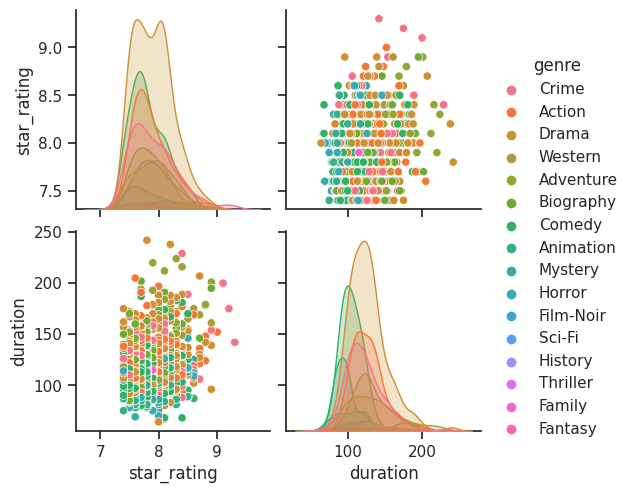

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(movies, hue= 'genre')

Text(0.5, 1.0, 'Pie Chart - Number of Titles by Genre')

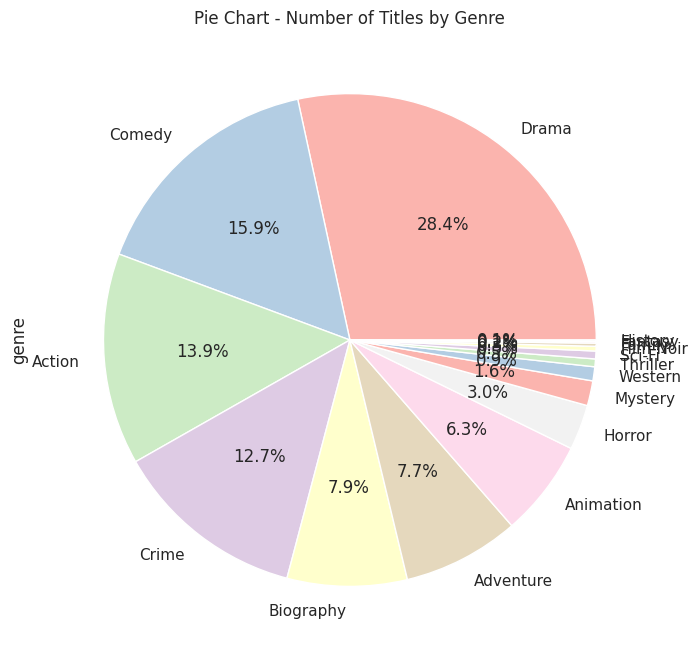

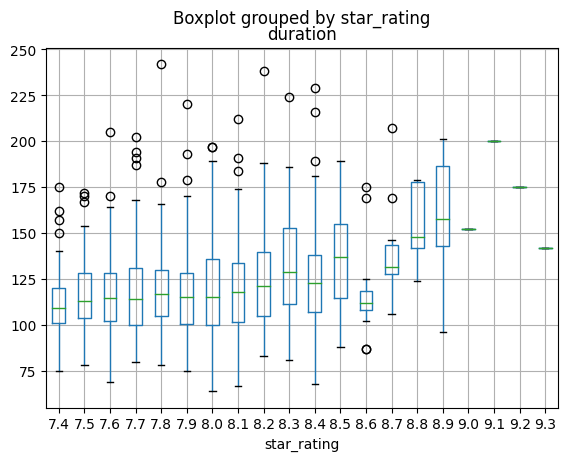

In [ ]:
# use a visualization to detect whether there is a relationship between duration and star rating
#movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.3)
#movies.hist(column='duration', by='star_rating', sharex=True, sharey=True);
movies.boxplot(column='duration', by='star_rating');

In [ ]:
# calculate the average duration for each genre
movies[['duration','genre']].groupby('genre').mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


<AxesSubplot: title={'center': 'duration'}, xlabel='content_rating'>

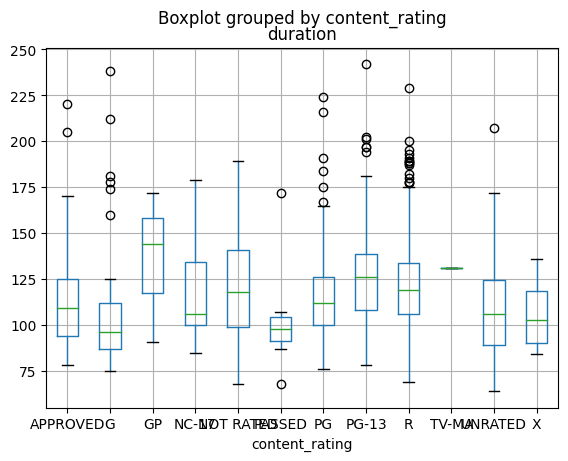

In [ ]:
# visualize the relationship between content rating and duration
#movies[['content_rating','duration']].plot(kind='box')
movies.boxplot(column='duration', by='content_rating')

In [ ]:
# determine the top rated movie (by star rating) for each genre
movies.sort_values('star_rating', ascending=False).groupby('genre')['title','star_rating'].first()

/tmp/ipykernel_97/2123558091.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  movies.sort_values('star_rating', ascending=False).groupby('genre')['title','star_rating'].first()


,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Modern Times,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


In [ ]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
result = movies[movies['title'].isin(movies[movies.duplicated(['title'])]['title'])]
result.sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [ ]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies
genres = movies['genre'].value_counts()[movies['genre'].value_counts() > 10].index
movies[movies['genre'].isin(genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

Text(0.5, 1.0, 'Bar Chart - Number of Titles by Genre')

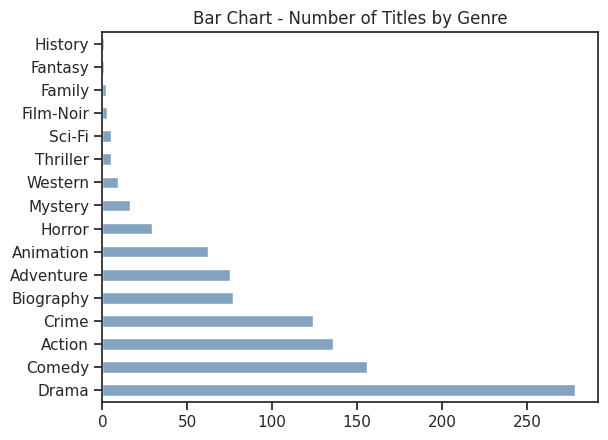